#### 02_EDA_and Feature Engineering: Hospital Readmission Prediction for Diabetic Patients

In [1]:
# Initialize Spark Session with optimized settings
import os
from pyspark.sql import SparkSession

# Set environment variables (if not set in terminal)
os.environ["HADOOP_HOME"] = "C:\\hadoop"
os.environ["JAVA_HOME"] = "C:\\Program Files\\Java\\jdk-20"

spark = SparkSession.builder \
    .appName("DiabeticReadmission") \
    .master("local[*]") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "2g") \
    .config("spark.sql.adaptive.enabled", "true") \
    .config("spark.sql.adaptive.coalescePartitions.enabled", "true") \
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
    .getOrCreate()

print(f"✓ Spark session initialized successfully!")

✓ Spark session initialized successfully!


In [2]:
# Import necessary libraries and functions 
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import StringType, IntegerType, FloatType

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

print("All packages imported successfully!")

All packages imported successfully!


In [3]:
df = spark.read.csv(
    r"C:/Projects/hospital_readmission_prediction/data/output/cleaned_diabetic_data_1.csv",
    header=True,
    inferSchema=True
)


In [4]:
df.show(5)
df.printSchema()
print("columns:", len(df.columns))
print("rows:", df.count())

+------+---+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+---------+---------+-------+------+-----------+----------+
|gender|age|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|num_lab_procedures|num_procedures|num_medications|number_outpatient|number_emergency|number_inpatient|diag_1|diag_2|diag_3|number_diagnoses|max_glu_serum|A1Cresult|metformin|glipizide|glyburide|insulin|change|diabetesMed|readmitted|
+------+---+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+-----------------+----------------+----------------+------+------+------+----------------+-------------+---------+---------+---------+---------+-------+------+-----------+----------+
|     0| 15|        Emerg

In [5]:
df.columns

['gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'glipizide',
 'glyburide',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

*Univariate Analysis*

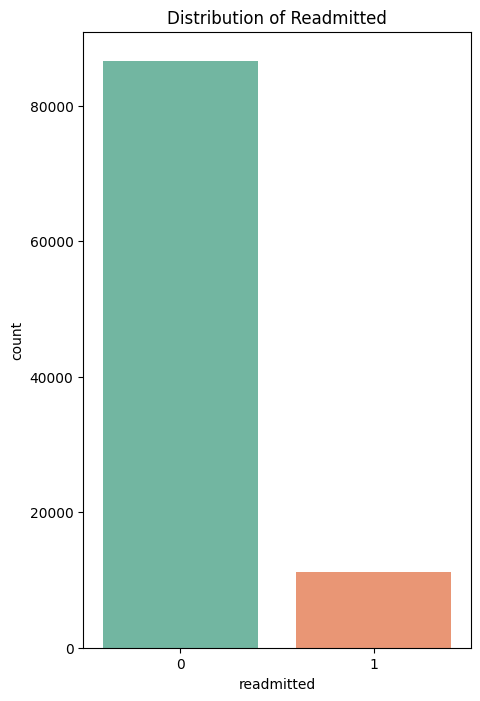

In [6]:
#target variable: readmitted

readmitted_data = df.select("readmitted").toPandas()

# Create the countplot
plt.figure(figsize=(5,8))
sns.countplot(data=readmitted_data, x='readmitted', palette='Set2')
plt.title("Distribution of Readmitted")
plt.show()

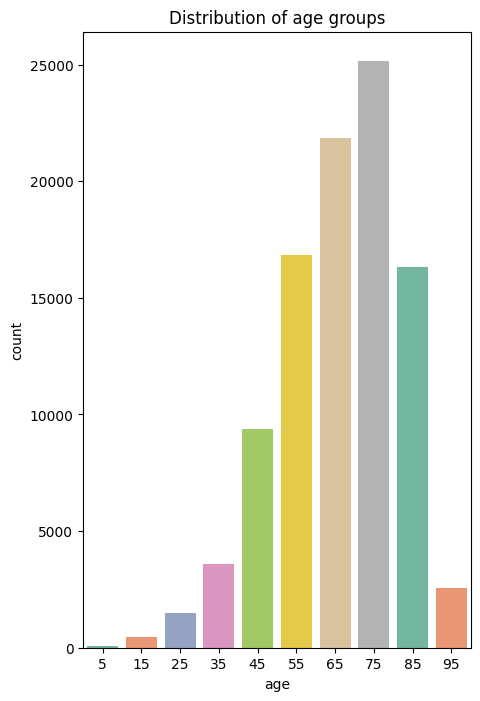

In [7]:
# age group distribution
age_data = df.select("age").toPandas()

plt.figure(figsize=(5,8))
sns.countplot(data=age_data, x='age', palette='Set2')
plt.title("Distribution of age groups")
plt.show()

In [8]:
# num_lab_procedures value counts
df.groupBy("num_lab_procedures").count().orderBy(F.desc("count")).show()

+------------------+-----+
|num_lab_procedures|count|
+------------------+-----+
|                 1| 3098|
|                43| 2725|
|                44| 2412|
|                45| 2308|
|                38| 2145|
|                40| 2133|
|                46| 2106|
|                41| 2055|
|                42| 2035|
|                39| 2018|
|                47| 2015|
|                37| 2006|
|                49| 1977|
|                48| 1967|
|                36| 1883|
|                51| 1853|
|                50| 1853|
|                35| 1832|
|                54| 1813|
|                55| 1762|
+------------------+-----+
only showing top 20 rows


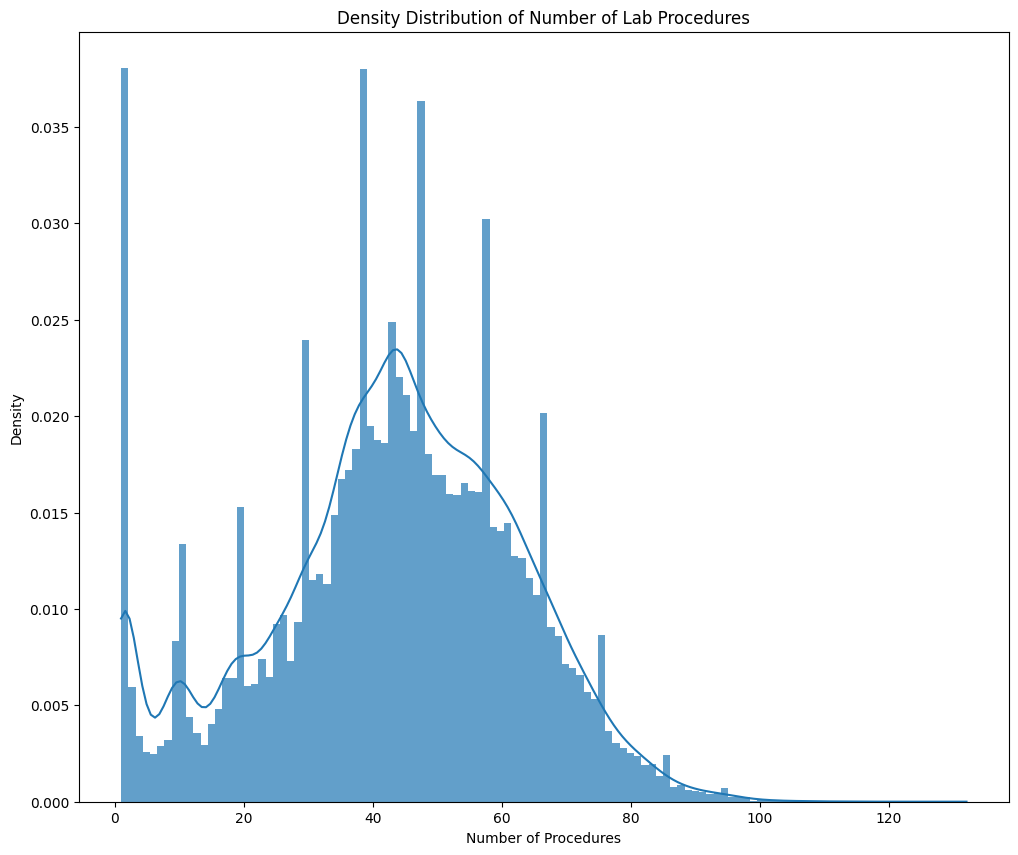

In [9]:
# Lab procedures distribution
lab_procedures_data = df.select("num_lab_procedures").toPandas()

plt.figure(figsize=(12,10))
sns.histplot(data=lab_procedures_data, x='num_lab_procedures', stat='density', kde=True, alpha=0.7, edgecolor = 'none')
plt.xlabel("Number of Procedures")
plt.ylabel("Density")
plt.title("Density Distribution of Number of Lab Procedures")
plt.show()


In [10]:
#num_procedures
df.groupBy("num_procedures").count().orderBy(F.desc("count")).show()

+--------------+-----+
|num_procedures|count|
+--------------+-----+
|             0|44702|
|             1|19920|
|             2|12260|
|             3| 9140|
|             6| 4785|
|             4| 4025|
|             5| 2973|
+--------------+-----+



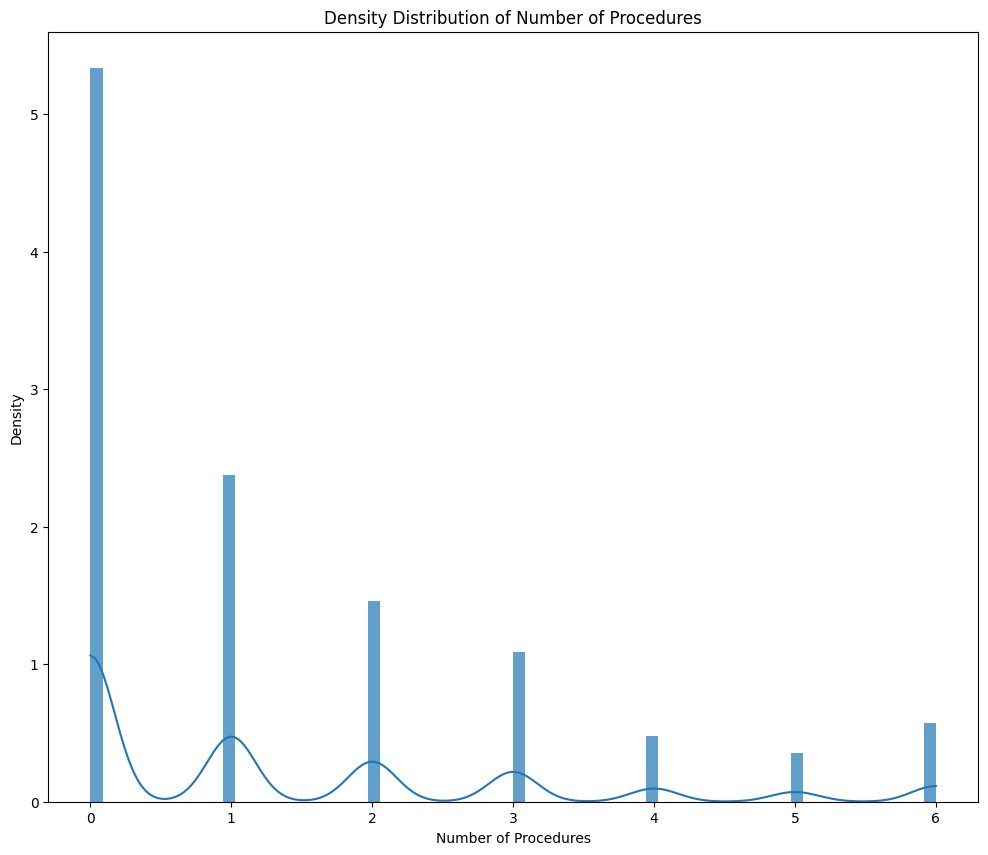

In [11]:
# num-procedures distribution
num_procedures_data = df.select("num_procedures").toPandas()

plt.figure(figsize=(12,10))
sns.histplot(data=num_procedures_data, x='num_procedures', stat='density', kde=True, alpha=0.7, edgecolor = 'none')
plt.xlabel("Number of Procedures")
plt.ylabel("Density")
plt.title("Density Distribution of Number of Procedures")
plt.show()

In [12]:
#dicharge_disposition_id
df.groupBy("discharge_disposition_id").count().orderBy(F.desc("count")).show()

+------------------------+-----+
|discharge_disposition_id|count|
+------------------------+-----+
|      Discharged to home|71928|
|    Transferred to an...|20574|
|           Not Available| 4598|
|                Left AMA|  604|
|    Still patient/ref...|  101|
+------------------------+-----+



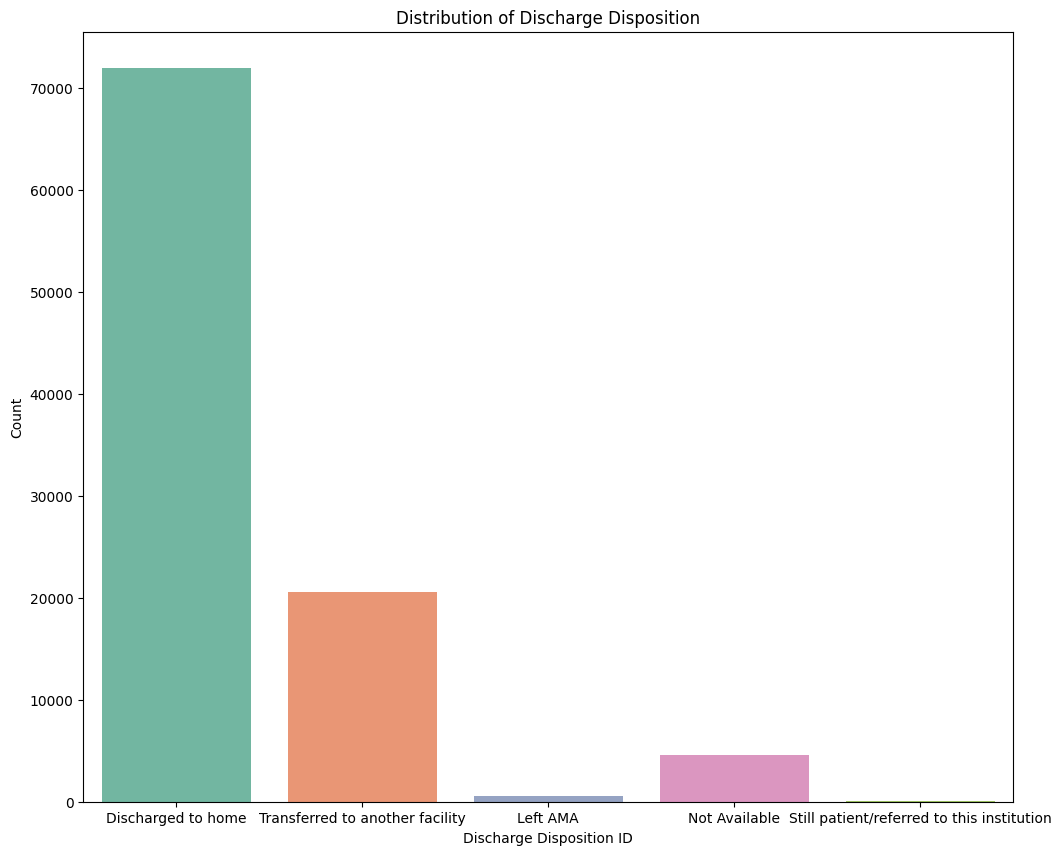

In [13]:
#discharge_disposition distribution
discharge_data = df.select("discharge_disposition_id").toPandas()

plt.figure(figsize=(12,10))
sns.countplot(data=discharge_data, x='discharge_disposition_id', palette='Set2')
plt.title("Distribution of Discharge Disposition")
plt.xlabel("Discharge Disposition ID")
plt.ylabel("Count")
plt.show()

In [14]:
#change
df.groupBy("change").count().orderBy(F.desc("count")).show()

+------+-----+
|change|count|
+------+-----+
|     0|52346|
|     1|45459|
+------+-----+



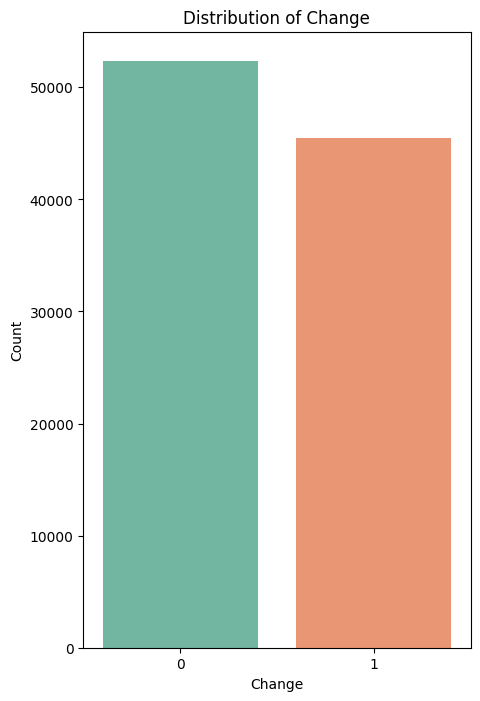

In [15]:
# change distribution
change_data = df.select("change").toPandas()

plt.figure(figsize=(5,8))
sns.countplot(data=change_data, x='change', palette='Set2')
plt.title("Distribution of Change")
plt.xlabel("Change")
plt.ylabel("Count")
plt.show()

*Bivariate analysis*

In [16]:
# Check for null values
from pyspark.sql.functions import col, sum as spark_sum, isnan, when, count

# Count null values for each column
null_counts = df.select([
    spark_sum(col(c).isNull().cast("int")).alias(c) 
    for c in df.columns
]).collect()[0].asDict()

# Display results
for column, null_count in null_counts.items():
    print(f"{column}: {null_count}")

gender: 0
age: 0
admission_type_id: 0
discharge_disposition_id: 0
admission_source_id: 0
time_in_hospital: 0
num_lab_procedures: 0
num_procedures: 0
num_medications: 0
number_outpatient: 0
number_emergency: 0
number_inpatient: 0
diag_1: 0
diag_2: 0
diag_3: 0
number_diagnoses: 0
max_glu_serum: 0
A1Cresult: 0
metformin: 0
glipizide: 0
glyburide: 0
insulin: 0
change: 0
diabetesMed: 0
readmitted: 0


In [17]:
#diabetesMed value counts
df.groupBy("diabetesMed").count().orderBy(F.desc("count")).show()

+-----------+-----+
|diabetesMed|count|
+-----------+-----+
|          1|75497|
|          0|22308|
+-----------+-----+



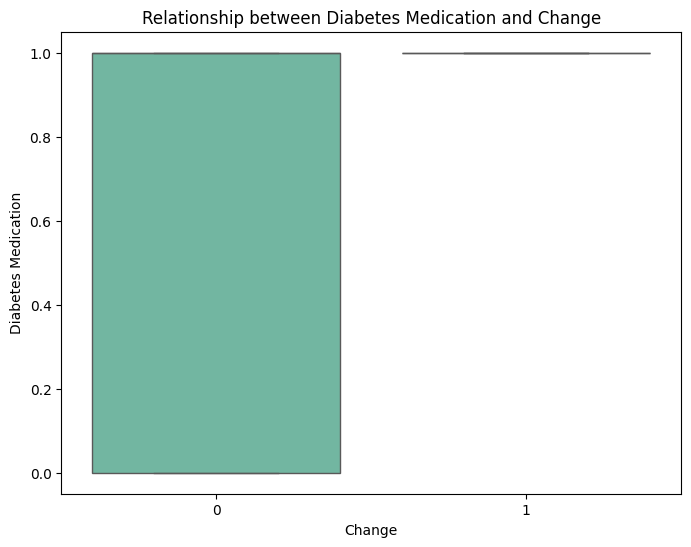

In [18]:
# Analysis between change and diabetesMed
bivariate_data = df.select("change", "diabetesMed").toPandas()

plt.figure(figsize=(8,6))
sns.boxplot(data=bivariate_data,y='diabetesMed', x='change', palette='Set2')
plt.title("Relationship between Diabetes Medication and Change")
plt.xlabel("Change")
plt.ylabel("Diabetes Medication")
plt.show()

*How many patients readmitted in each group?*

In [19]:
# Relation between age group and readmission status
df.crosstab("age", "readmitted").show()

+--------------+-----+----+
|age_readmitted|    0|   1|
+--------------+-----+----+
|            15|  437|  31|
|            85|14278|2047|
|            35| 3195| 410|
|             5|   62|   1|
|            75|22114|3040|
|            55|15188|1659|
|            95| 2276| 305|
|            25| 1289| 217|
|            65|19380|2481|
|            45| 8380|1015|
+--------------+-----+----+



In [20]:
# Quick readmission stats by age with percentages
age_stats = df.groupBy("age").agg(
    F.count("*").alias("total"),
    F.sum(F.when(F.col("readmitted") == 1, 1).otherwise(0)).alias("readmitted")
).withColumn("readmission_rate_pct", F.round((F.col("readmitted") / F.col("total") * 100), 2)).orderBy("age")

print("Age-based readmission analysis:")
age_stats.show()
print(f"Overall readmission rate: {df.agg(F.avg('readmitted')).collect()[0][0]:.2%}")

Age-based readmission analysis:
+---+-----+----------+--------------------+
|age|total|readmitted|readmission_rate_pct|
+---+-----+----------+--------------------+
|  5|   63|         1|                1.59|
| 15|  468|        31|                6.62|
| 25| 1506|       217|               14.41|
| 35| 3605|       410|               11.37|
| 45| 9395|      1015|                10.8|
| 55|16847|      1659|                9.85|
| 65|21861|      2481|               11.35|
| 75|25154|      3040|               12.09|
| 85|16325|      2047|               12.54|
| 95| 2581|       305|               11.82|
+---+-----+----------+--------------------+

Overall readmission rate: 11.46%


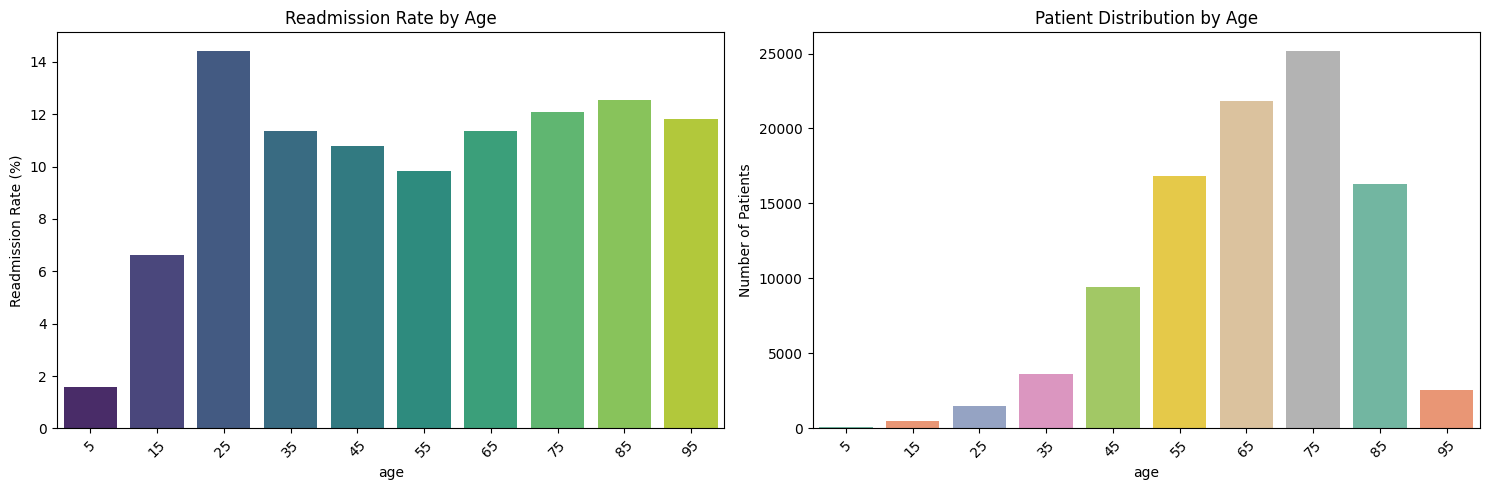

In [21]:
# Visualize age vs readmission patterns
age_data = age_stats.toPandas()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot of readmission rates
sns.barplot(data=age_data, x='age', y='readmission_rate_pct', ax=ax1, palette='viridis')
ax1.set_title('Readmission Rate by Age')
ax1.set_ylabel('Readmission Rate (%)')
ax1.tick_params(axis='x', rotation=45)

# Patient distribution by age
sns.barplot(data=age_data, x='age', y='total', ax=ax2, palette='Set2')
ax2.set_title('Patient Distribution by Age')
ax2.set_ylabel('Number of Patients')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [22]:
# A1C results value counts
df.groupBy("A1Cresult").count().orderBy(F.desc("count")).show()

+---------+-----+
|A1Cresult|count|
+---------+-----+
|        0|81393|
|        2|11545|
|        1| 4867|
+---------+-----+



In [23]:
#insulin value counts
df.groupBy("insulin").count().orderBy(F.desc("count")).show()

+-------+-----+
|insulin|count|
+-------+-----+
|      0|75274|
|      1|22531|
+-------+-----+



In [24]:
#Relationship between insulin and readmission

df.crosstab("insulin", "readmitted").show()

+------------------+-----+----+
|insulin_readmitted|    0|   1|
+------------------+-----+----+
|                 0|67185|8089|
|                 1|19414|3117|
+------------------+-----+----+



In [25]:
#Relationship between diabetesMed and readmission
df.crosstab("diabetesMed", "readmitted").show()

+----------------------+-----+----+
|diabetesMed_readmitted|    0|   1|
+----------------------+-----+----+
|                     0|20086|2222|
|                     1|66513|8984|
+----------------------+-----+----+



In [26]:
df.crosstab("A1Cresult", "readmitted").show()

+--------------------+-----+----+
|A1Cresult_readmitted|    0|   1|
+--------------------+-----+----+
|                   0|71839|9554|
|                   1| 4388| 479|
|                   2|10372|1173|
+--------------------+-----+----+



In [27]:
df.crosstab("A1Cresult", "diabetesMed").show()

+---------------------+-----+-----+
|A1Cresult_diabetesMed|    0|    1|
+---------------------+-----+-----+
|                    0|19599|61794|
|                    1| 1225| 3642|
|                    2| 1484|10061|
+---------------------+-----+-----+



In [28]:
df.crosstab("A1Cresult", "change").show()

+----------------+-----+-----+
|A1Cresult_change|    0|    1|
+----------------+-----+-----+
|               0|45169|36224|
|               1| 2716| 2151|
|               2| 4461| 7084|
+----------------+-----+-----+



In [29]:
df.groupBy("max_glu_serum").count().orderBy(F.desc("count")).show()

+-------------+-----+
|max_glu_serum|count|
+-------------+-----+
|            0|92741|
|            2| 2560|
|            1| 2504|
+-------------+-----+



In [30]:
df.crosstab("max_glu_serum", "readmitted").show()

+------------------------+-----+-----+
|max_glu_serum_readmitted|    0|    1|
+------------------------+-----+-----+
|                       0|82190|10551|
|                       1| 2212|  292|
|                       2| 2197|  363|
+------------------------+-----+-----+



In [31]:
df.crosstab("max_glu_serum", "A1Cresult") .show()

+-----------------------+-----+----+-----+
|max_glu_serum_A1Cresult|    0|   1|    2|
+-----------------------+-----+----+-----+
|                      0|76619|4810|11312|
|                      1| 2407|  38|   59|
|                      2| 2367|  19|  174|
+-----------------------+-----+----+-----+



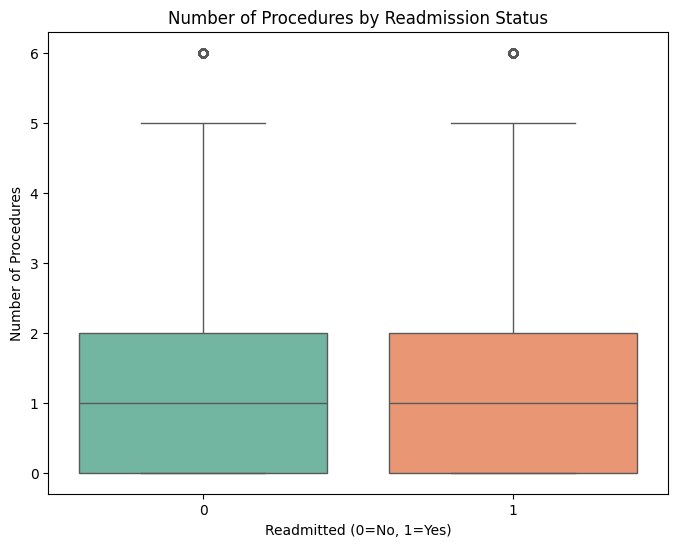

In [32]:
# Relationship between readmission and number of procedures
procedures_readmit_data = df.select("readmitted", "num_procedures").toPandas()

plt.figure(figsize=(8,6))
sns.boxplot(data=procedures_readmit_data, x='readmitted', y='num_procedures', palette='Set2')
plt.title("Number of Procedures by Readmission Status")
plt.xlabel("Readmitted (0=No, 1=Yes)")
plt.ylabel("Number of Procedures")
plt.show()

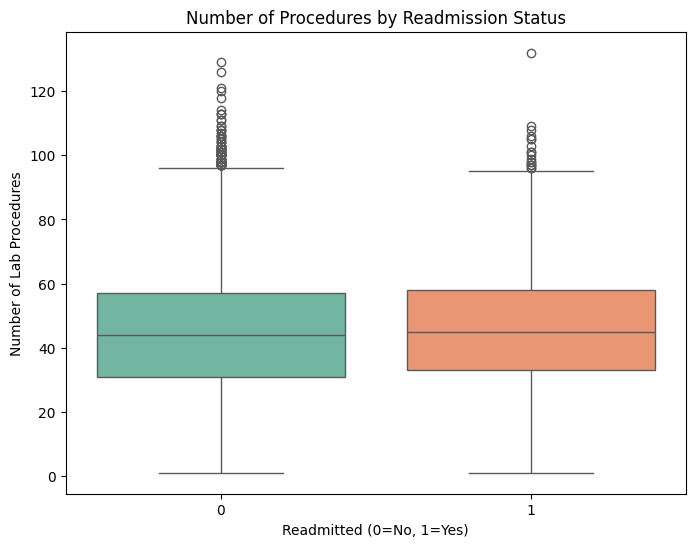

In [33]:
# Relationship between readmission and number of lab procedures
procedures_readmit_data = df.select("readmitted", "num_lab_procedures").toPandas()

plt.figure(figsize=(8,6))
sns.boxplot(data=procedures_readmit_data, x='readmitted', y='num_lab_procedures', palette='Set2')
plt.title("Number of Procedures by Readmission Status")
plt.xlabel("Readmitted (0=No, 1=Yes)")
plt.ylabel("Number of Lab Procedures")
plt.show()

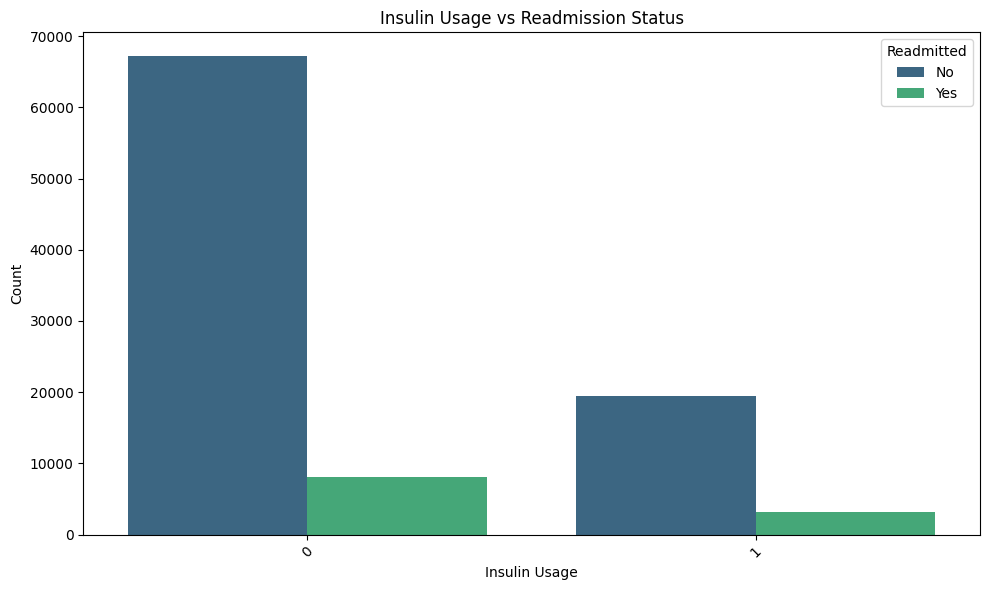

In [34]:
# Insulin usage vs readmission status
insulin_readmit_data = df.select("insulin", "readmitted").toPandas()

plt.figure(figsize=(10,6))
sns.countplot(data=insulin_readmit_data, x='insulin', hue='readmitted', palette='viridis')
plt.title("Insulin Usage vs Readmission Status")
plt.xlabel("Insulin Usage")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Readmitted', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

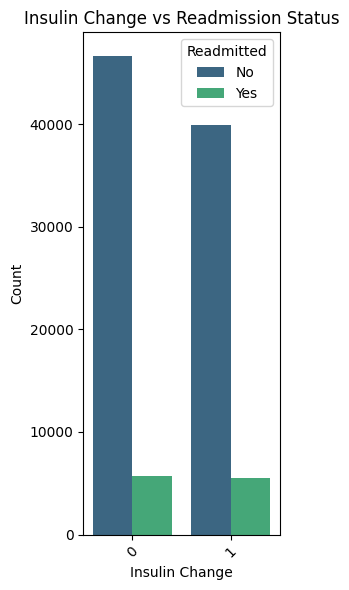

In [35]:
# Insulin change vs readmission status
insulin_readmit_data = df.select("change", "readmitted").toPandas()

plt.figure(figsize=(3,6))
sns.countplot(data=insulin_readmit_data, x='change', hue='readmitted', palette='viridis')
plt.title("Insulin Change vs Readmission Status")
plt.xlabel("Insulin Change")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Readmitted', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

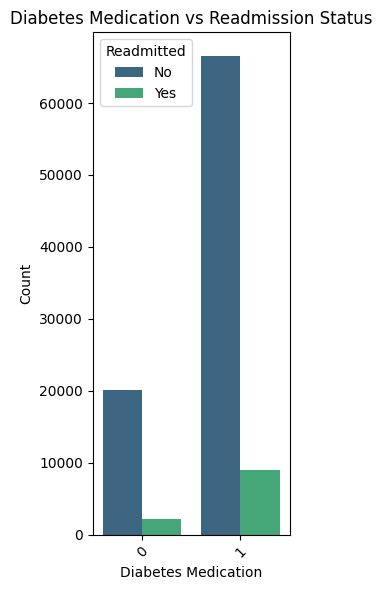

In [36]:
# Diabetes Medication vs Readmission Status
diabetes_readmit_data = df.select("diabetesMed", "readmitted").toPandas()

plt.figure(figsize=(3,6))
sns.countplot(data=diabetes_readmit_data, x='diabetesMed', hue='readmitted', palette='viridis')
plt.title("Diabetes Medication vs Readmission Status")
plt.xlabel("Diabetes Medication")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Readmitted', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

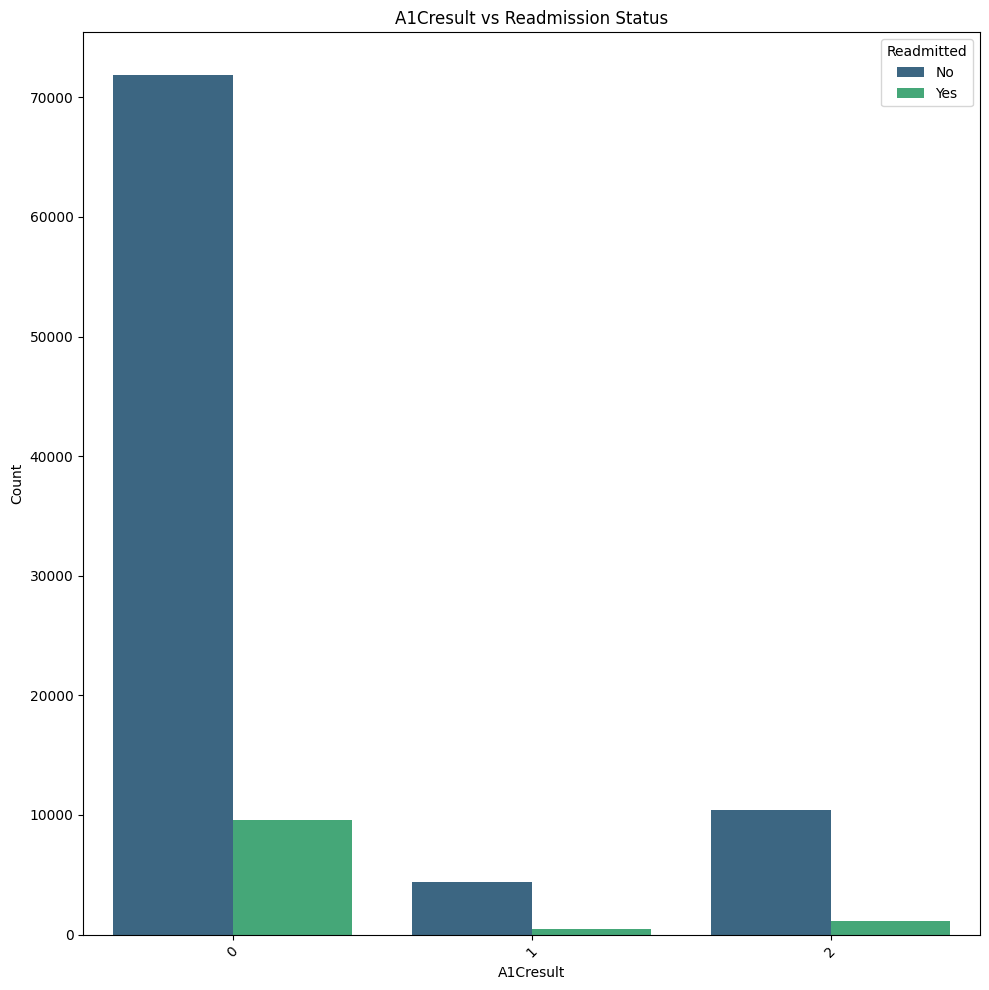

In [37]:
# A1Cresult vs readmission status
a1c_readmit_data = df.select("A1Cresult", "readmitted").toPandas()

plt.figure(figsize=(10,10))
sns.countplot(data=a1c_readmit_data, x='A1Cresult', hue='readmitted', palette='viridis')
plt.title("A1Cresult vs Readmission Status")
plt.xlabel("A1Cresult")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Readmitted', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

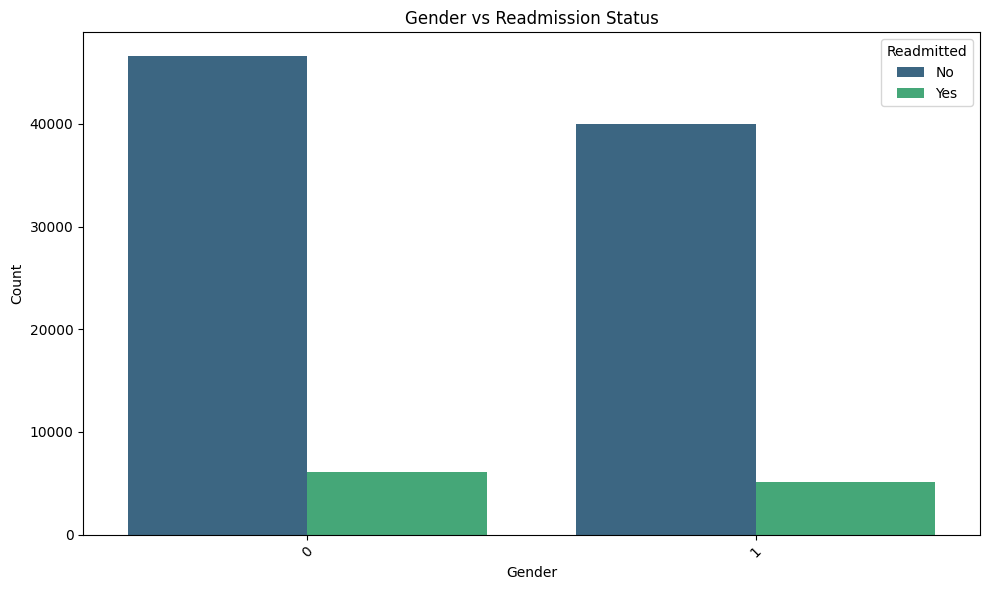

In [38]:
# Gender vs readmission status
gender_readmit_data = df.select("gender", "readmitted").toPandas()

plt.figure(figsize=(10,6))
sns.countplot(data=gender_readmit_data, x='gender', hue='readmitted', palette='viridis')
plt.title("Gender vs Readmission Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Readmitted', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

<small>
Feature Engineering:   

*Derive total_visit from a variaable number of inpatient (admission), emergency room visits and outpatients*

In [39]:
# Create total_visits feature from outpatient, emergency, and inpatient visits
df = df.withColumn("total_visits", 
                   F.col("number_outpatient") + 
                   F.col("number_emergency") + 
                   F.col("number_inpatient"))

# Check the new feature
print("Total visits feature created:")
df.select("number_outpatient", "number_emergency", "number_inpatient", "total_visits").show(5)

Total visits feature created:
+-----------------+----------------+----------------+------------+
|number_outpatient|number_emergency|number_inpatient|total_visits|
+-----------------+----------------+----------------+------------+
|                0|               0|               0|           0|
|                2|               0|               1|           3|
|                0|               0|               0|           0|
|                0|               0|               0|           0|
|                0|               0|               0|           0|
+-----------------+----------------+----------------+------------+
only showing top 5 rows


In [40]:
columns_to_drop = ["number_outpatient", "number_emergency", "number_inpatient"]
df = df.drop(*columns_to_drop)

In [41]:
df.columns

['gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'glipizide',
 'glyburide',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted',
 'total_visits']

In [42]:
df.show(5)

+------+---+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+------+------+------+----------------+-------------+---------+---------+---------+---------+-------+------+-----------+----------+------------+
|gender|age|admission_type_id|discharge_disposition_id|admission_source_id|time_in_hospital|num_lab_procedures|num_procedures|num_medications|diag_1|diag_2|diag_3|number_diagnoses|max_glu_serum|A1Cresult|metformin|glipizide|glyburide|insulin|change|diabetesMed|readmitted|total_visits|
+------+---+-----------------+------------------------+-------------------+----------------+------------------+--------------+---------------+------+------+------+----------------+-------------+---------+---------+---------+---------+-------+------+-----------+----------+------------+
|     0| 15|        Emergency|      Discharged to home|          Emergency|               3|                59|             0|             18|

<small>
Mapping diag_1, diag_2, diag-3 with ICD-9

In [43]:
# Load ICD-9 mapping file

# Convert Excel to CSV using pandas (one-time conversion)
import pandas as pd

# Read Excel with pandas
icd_pd = pd.read_excel(r"C:\Projects\hospital_readmission_prediction\data\diabetes_130_us_hospitals\section111validicd9-jan2025_0.xlsx")

# Save as CSV
icd_pd.to_csv(r"C:\Projects\hospital_readmission_prediction\data\diabetes_130_us_hospitals\icd9_mapping.csv", index=False)

# Now read CSV with Spark
icd_spark = spark.read.csv(
    r"C:\Projects\hospital_readmission_prediction\data\diabetes_130_us_hospitals\icd9_mapping.csv",
    header=True,
    inferSchema=True
)

print("ICD-9 data loaded with Spark from CSV:")
icd_spark.show(10)

ICD-9 data loaded with Spark from CSV:
+----+-------------------------------------+-------+
|CODE|LONG DESCRIPTION (VALID ICD-9 FY2025)|NF EXCL|
+----+-------------------------------------+-------+
|0010|                 Cholera due to vi...|   NULL|
|0011|                 Cholera due to vi...|   NULL|
|0019|                 Cholera, unspecified|   NULL|
|0020|                        Typhoid fever|   NULL|
|0021|                  Paratyphoid fever A|   NULL|
|0022|                  Paratyphoid fever B|   NULL|
|0023|                  Paratyphoid fever C|   NULL|
|0029|                 Paratyphoid fever...|   NULL|
|0030|                 Salmonella gastro...|   NULL|
|0031|                 Salmonella septic...|   NULL|
+----+-------------------------------------+-------+
only showing top 10 rows


In [44]:
# Explore the diagnosis columns and ICD data structure

diag_cols = [col for col in df.columns if 'diag' in col.lower()]
print(diag_cols)

# Check unique values in diagnosis columns
for col in diag_cols:
    print(f"\n{col} - unique values:")
    try:
        df.select(col).distinct().show()
    except Exception as e:
        print(f"Error showing distinct values for {col}: {e}")

# Explore ICD mapping structure

icd_spark.printSchema()
print("ICD columns:", icd_spark.columns)
icd_spark.show(5, truncate=False)

['diag_1', 'diag_2', 'diag_3', 'number_diagnoses']

diag_1 - unique values:
+------+
|diag_1|
+------+
|   296|
|   691|
|   451|
|   853|
|   800|
|   447|
|   591|
|     7|
|250.01|
|   574|
|   475|
|   718|
|   307|
|   577|
|   581|
|   205|
|   747|
|   334|
|   462|
|   711|
+------+
only showing top 20 rows

diag_2 - unique values:
+------+
|diag_2|
+------+
|   296|
|   691|
|   451|
|   V72|
|   919|
|   870|
|250.01|
|   447|
|   591|
|   574|
|   718|
|   307|
|   475|
|   577|
|   581|
|   205|
|  E858|
|   747|
|   272|
|   711|
+------+
only showing top 20 rows

diag_3 - unique values:
+------+
|diag_3|
+------+
|   296|
|   451|
|  E876|
|   V72|
|   944|
|   919|
|   870|
|250.01|
|   591|
|   447|
|     7|
|   574|
|   307|
|   718|
|   581|
|   577|
|   334|
|  E816|
|   205|
|  E858|
+------+
only showing top 20 rows

number_diagnoses - unique values:
+----------------+
|number_diagnoses|
+----------------+
|               6|
|               3|
|               5|
| 

In [45]:
# Apply diagnosis mapping to ALL diagnosis columns
from pyspark.sql.functions import col, when

# Apply mapping logic to ALL diagnosis columns with proper numeric handling
df = df.withColumn("diag_1_num", when(col("diag_1").rlike("^[0-9]+(\\.[0-9]+)?$"), col("diag_1").cast("float")).otherwise(None))
df = df.withColumn("diag_2_num", when(col("diag_2").rlike("^[0-9]+(\\.[0-9]+)?$"), col("diag_2").cast("float")).otherwise(None))
df = df.withColumn("diag_3_num", when(col("diag_3").rlike("^[0-9]+(\\.[0-9]+)?$"), col("diag_3").cast("float")).otherwise(None))

# Map diag_1 categories using the numeric column  
df = df.withColumn("diag_1",
    when((col("diag_1_num") >= 1) & (col("diag_1_num") <= 139), "Infectious_Parasitic")
    .when((col("diag_1_num") >= 140) & (col("diag_1_num") <= 239), "Neoplasms")
    .when((col("diag_1_num") >= 240) & (col("diag_1_num") <= 279), "Endocrine_Nutritional_Metabolic")
    .when((col("diag_1_num") >= 280) & (col("diag_1_num") <= 289), "Blood_Disorders")
    .when((col("diag_1_num") >= 290) & (col("diag_1_num") <= 319), "Mental_Disorders")
    .when((col("diag_1_num") >= 320) & (col("diag_1_num") <= 389), "Nervous_System")
    .when((col("diag_1_num") >= 390) & (col("diag_1_num") <= 459), "Circulatory_System")
    .when((col("diag_1_num") >= 460) & (col("diag_1_num") <= 519), "Respiratory_System")
    .when((col("diag_1_num") >= 520) & (col("diag_1_num") <= 579), "Digestive_System")
    .when((col("diag_1_num") >= 580) & (col("diag_1_num") <= 629), "Genitourinary_System")
    .when((col("diag_1_num") >= 630) & (col("diag_1_num") <= 679), "Pregnancy_Childbirth")
    .when((col("diag_1_num") >= 680) & (col("diag_1_num") <= 709), "Skin_Disorders")
    .when((col("diag_1_num") >= 710) & (col("diag_1_num") <= 739), "Musculoskeletal")
    .when((col("diag_1_num") >= 740) & (col("diag_1_num") <= 759), "Congenital_Anomalies")
    .when((col("diag_1_num") >= 760) & (col("diag_1_num") <= 779), "Perinatal_Conditions")
    .when((col("diag_1_num") >= 780) & (col("diag_1_num") <= 799), "Symptoms_Signs")
    .when((col("diag_1_num") >= 800) & (col("diag_1_num") <= 999), "Injury_Poisoning")
    .otherwise("Unknown")
)

In [46]:
# Map diag_2 categories
df = df.withColumn("diag_2",
    when((col("diag_2_num") >= 1) & (col("diag_2_num") <= 139), "Infectious_Parasitic")
    .when((col("diag_2_num") >= 140) & (col("diag_2_num") <= 239), "Neoplasms")
    .when((col("diag_2_num") >= 240) & (col("diag_2_num") <= 279), "Endocrine_Nutritional_Metabolic")
    .when((col("diag_2_num") >= 280) & (col("diag_2_num") <= 289), "Blood_Disorders")
    .when((col("diag_2_num") >= 290) & (col("diag_2_num") <= 319), "Mental_Disorders")
    .when((col("diag_2_num") >= 320) & (col("diag_2_num") <= 389), "Nervous_System")
    .when((col("diag_2_num") >= 390) & (col("diag_2_num") <= 459), "Circulatory_System")
    .when((col("diag_2_num") >= 460) & (col("diag_2_num") <= 519), "Respiratory_System")
    .when((col("diag_2_num") >= 520) & (col("diag_2_num") <= 579), "Digestive_System")
    .when((col("diag_2_num") >= 580) & (col("diag_2_num") <= 629), "Genitourinary_System")
    .when((col("diag_2_num") >= 630) & (col("diag_2_num") <= 679), "Pregnancy_Childbirth")
    .when((col("diag_2_num") >= 680) & (col("diag_2_num") <= 709), "Skin_Disorders")
    .when((col("diag_2_num") >= 710) & (col("diag_2_num") <= 739), "Musculoskeletal")
    .when((col("diag_2_num") >= 740) & (col("diag_2_num") <= 759), "Congenital_Anomalies")
    .when((col("diag_2_num") >= 760) & (col("diag_2_num") <= 779), "Perinatal_Conditions")
    .when((col("diag_2_num") >= 780) & (col("diag_2_num") <= 799), "Symptoms_Signs")
    .when((col("diag_2_num") >= 800) & (col("diag_2_num") <= 999), "Injury_Poisoning")
    .otherwise("Unknown")
)

In [47]:
# Map diag_3 categories
df = df.withColumn("diag_3",
    when((col("diag_3_num") >= 1) & (col("diag_3_num") <= 139), "Infectious_Parasitic")
    .when((col("diag_3_num") >= 140) & (col("diag_3_num") <= 239), "Neoplasms")
    .when((col("diag_3_num") >= 240) & (col("diag_3_num") <= 279), "Endocrine_Nutritional_Metabolic")
    .when((col("diag_3_num") >= 280) & (col("diag_3_num") <= 289), "Blood_Disorders")
    .when((col("diag_3_num") >= 290) & (col("diag_3_num") <= 319), "Mental_Disorders")
    .when((col("diag_3_num") >= 320) & (col("diag_3_num") <= 389), "Nervous_System")
    .when((col("diag_3_num") >= 390) & (col("diag_3_num") <= 459), "Circulatory_System")
    .when((col("diag_3_num") >= 460) & (col("diag_3_num") <= 519), "Respiratory_System")
    .when((col("diag_3_num") >= 520) & (col("diag_3_num") <= 579), "Digestive_System")
    .when((col("diag_3_num") >= 580) & (col("diag_3_num") <= 629), "Genitourinary_System")
    .when((col("diag_3_num") >= 630) & (col("diag_3_num") <= 679), "Pregnancy_Childbirth")
    .when((col("diag_3_num") >= 680) & (col("diag_3_num") <= 709), "Skin_Disorders")
    .when((col("diag_3_num") >= 710) & (col("diag_3_num") <= 739), "Musculoskeletal")
    .when((col("diag_3_num") >= 740) & (col("diag_3_num") <= 759), "Congenital_Anomalies")
    .when((col("diag_3_num") >= 760) & (col("diag_3_num") <= 779), "Perinatal_Conditions")
    .when((col("diag_3_num") >= 780) & (col("diag_3_num") <= 799), "Symptoms_Signs")
    .when((col("diag_3_num") >= 800) & (col("diag_3_num") <= 999), "Injury_Poisoning")
    .otherwise("Unknown")
)

In [48]:
df.groupBy("diag_1").count().orderBy(F.desc("count")).show()

+--------------------+-----+
|              diag_1|count|
+--------------------+-----+
|  Circulatory_System|29449|
|Endocrine_Nutriti...|10660|
|  Respiratory_System| 9840|
|    Digestive_System| 8961|
|      Symptoms_Signs| 7530|
|    Injury_Poisoning| 6712|
|Genitourinary_System| 4922|
|     Musculoskeletal| 4833|
|           Neoplasms| 3088|
|Infectious_Parasitic| 2543|
|      Skin_Disorders| 2469|
|    Mental_Disorders| 2216|
|             Unknown| 1625|
|      Nervous_System| 1165|
|     Blood_Disorders| 1082|
|Pregnancy_Childbirth|  660|
|Congenital_Anomalies|   50|
+--------------------+-----+



In [49]:
df.groupBy("diag_2").count().orderBy(F.desc("count")).show()

+--------------------+-----+
|              diag_2|count|
+--------------------+-----+
|  Circulatory_System|30604|
|Endocrine_Nutriti...|19946|
|  Respiratory_System| 9720|
|Genitourinary_System| 7736|
|      Symptoms_Signs| 4467|
|    Digestive_System| 3861|
|      Skin_Disorders| 3522|
|     Blood_Disorders| 2864|
|    Mental_Disorders| 2611|
|             Unknown| 2456|
|    Injury_Poisoning| 2360|
|           Neoplasms| 2321|
|Infectious_Parasitic| 1835|
|     Musculoskeletal| 1757|
|      Nervous_System| 1226|
|Pregnancy_Childbirth|  414|
|Congenital_Anomalies|  105|
+--------------------+-----+



In [50]:
df.groupBy("diag_3").count().orderBy(F.desc("count")).show()

+--------------------+-----+
|              diag_3|count|
+--------------------+-----+
|  Circulatory_System|29212|
|Endocrine_Nutriti...|25825|
|  Respiratory_System| 6420|
|Genitourinary_System| 6079|
|             Unknown| 5012|
|      Symptoms_Signs| 4408|
|    Digestive_System| 3506|
|    Mental_Disorders| 3101|
|     Blood_Disorders| 2444|
|      Skin_Disorders| 2425|
|     Musculoskeletal| 1897|
|    Injury_Poisoning| 1894|
|Infectious_Parasitic| 1813|
|      Nervous_System| 1709|
|           Neoplasms| 1658|
|Pregnancy_Childbirth|  308|
|Congenital_Anomalies|   94|
+--------------------+-----+



In [51]:
# Clean up temporary numeric columns from ICD mapping
df = df.drop("diag_1_num", "diag_2_num", "diag_3_num")

In [52]:
df.show()

+------+---+-----------------+------------------------+--------------------+----------------+------------------+--------------+---------------+--------------------+--------------------+--------------------+----------------+-------------+---------+---------+---------+---------+-------+------+-----------+----------+------------+
|gender|age|admission_type_id|discharge_disposition_id| admission_source_id|time_in_hospital|num_lab_procedures|num_procedures|num_medications|              diag_1|              diag_2|              diag_3|number_diagnoses|max_glu_serum|A1Cresult|metformin|glipizide|glyburide|insulin|change|diabetesMed|readmitted|total_visits|
+------+---+-----------------+------------------------+--------------------+----------------+------------------+--------------+---------------+--------------------+--------------------+--------------------+----------------+-------------+---------+---------+---------+---------+-------+------+-----------+----------+------------+
|     0| 15| 

In [53]:
# Identify all column types for final preprocessing
categorical_cols = []
numerical_cols = []

for col_name, col_type in df.dtypes:
    if col_name == 'readmitted':  # Skip target variable
        continue
    elif col_type == 'string':
        categorical_cols.append(col_name)
    else:
        numerical_cols.append(col_name)

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

Categorical columns (6): ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3']
Numerical columns (16): ['gender', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'insulin', 'change', 'diabetesMed', 'total_visits']


In [54]:
# Encoding for categorical features
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

# StringIndexers for categorical columns
indexers = []
for cat_col in categorical_cols:
    indexer = StringIndexer(
        inputCol=cat_col,
        outputCol=f"{cat_col}_indexed",
        handleInvalid="keep"
    )
    indexers.append(indexer)

# OneHotEncoders for indexed categorical columns
encoders = []
encoded_cols = []
for cat_col in categorical_cols:
    encoder = OneHotEncoder(
        inputCols=[f"{cat_col}_indexed"],
        outputCols=[f"{cat_col}_encoded"],
        handleInvalid="keep"
    )
    encoders.append(encoder)
    encoded_cols.append(f"{cat_col}_encoded")

print(f"✓ Created {len(indexers)} StringIndexers and {len(encoders)} OneHotEncoders")

✓ Created 6 StringIndexers and 6 OneHotEncoders


In [55]:
# Combine all features into a single vector
all_feature_cols = numerical_cols + encoded_cols

assembler = VectorAssembler(
    inputCols=all_feature_cols,
    outputCol="features_raw",
    handleInvalid="skip"
)

# Scale numerical features
scaler = StandardScaler(
    inputCol="features_raw",
    outputCol="features",
    withStd=True,
    withMean=True
)

preprocessing_pipeline = Pipeline(
    stages=indexers + encoders + [assembler, scaler]
)

In [56]:
# Fit and transform the data
fitted_pipeline = preprocessing_pipeline.fit(df)
df_processed = fitted_pipeline.transform(df)


In [61]:
df_ml=df_processed.select("features", "readmitted")

In [63]:
df_ml.show(5, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [64]:
print(f"Feature vector size: {len(df_ml.select('features').first()[0])}")

Feature vector size: 85


In [65]:
# Save the feature-engineered data (human-readable)
df_fe_pd = df.toPandas()  # This has the ICD-9 mapped diagnosis
df_fe_pd.to_csv("C:/Projects/hospital_readmission_prediction/data/output/feature_engineered_data.csv", index=False)

# Save the ML-ready data (encoded features)
df_ml_pd = df_ml.toPandas()  # This has the encoded features vector
df_ml_pd.to_csv("C:/Projects/hospital_readmission_prediction/data/output/ml_ready_data.csv", index=False)